In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('newdata\\csv\\newdata.csv')
df.head()

,no_paths,no_points,drawing
0,5,883,car
1,4,596,fish
2,8,571,house
3,3,575,tree
4,5,586,bicycle


In [3]:
df.tail()

,no_paths,no_points,drawing
5502,3,572,tree
5503,10,703,bicycle
5504,11,613,guitar
5505,8,990,pencil
5506,1,124,clock


In [4]:
df['drawing'].value_counts()

tree       694
bicycle    692
guitar     692
clock      690
car        689
house      689
fish       686
pencil     675
Name: drawing, dtype: int64

<AxesSubplot: >

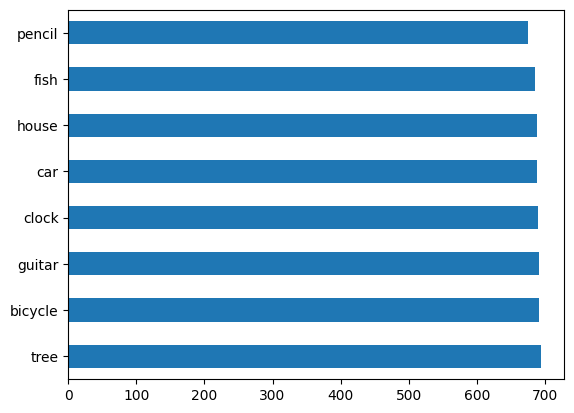

In [5]:
df['drawing'].value_counts().plot(kind='barh')

#### Label Encoding
Transforming categorical data into a numerical ones

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

In [7]:
labels = label_encode.fit_transform(df.drawing)
df['drawing']=labels

In [8]:
df.head()

,no_paths,no_points,drawing
0,5,883,1
1,4,596,3
2,8,571,5
3,3,575,7
4,5,586,0


Let's see each number to which categorical data was associated

In [9]:
label_mapping = dict(zip(label_encode.classes_, label_encode.transform(label_encode.classes_)))
label_mapping

{'bicycle': 0,
 'car': 1,
 'clock': 2,
 'fish': 3,
 'guitar': 4,
 'house': 5,
 'pencil': 6,
 'tree': 7}

#### Data splitting & Standardization
- Splitting data

In [10]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
X.head()

,no_paths,no_points
0,5,883
1,4,596
2,8,571
3,3,575
4,5,586


In [12]:
y

0       1
1       3
2       5
3       7
4       0
       ..
5502    7
5503    0
5504    4
5505    6
5506    2
Name: drawing, Length: 5507, dtype: int32

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [14]:
X_train

,no_paths,no_points
2694,10,422
2106,13,1127
3339,2,139
3948,25,4786
2257,5,772
...,...,...
905,12,388
5192,2,335
3980,23,1262
235,3,235


- Data Standardization

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
X_train_scaled

array([[-0.16691483, -0.40507813],
       [ 0.06993468,  0.64021525],
       [-0.79851354, -0.82467817],
       ...,
       [ 0.85943306,  0.84037781],
       [-0.7195637 , -0.68234035],
       [-0.48271419, -0.59337921]])

### Model Training
- K-Nearest Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

In [20]:
model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [21]:
model.score(X_test_scaled,y_test)

0.19633507853403143

before cleaning the data the accuracy is : 0.19633507853403143 

Bad accuracy HAHAHA. for k=5 Let's try another value for k

In [22]:
model2 = KNeighborsClassifier(n_neighbors=8)
model2.fit(X_train_scaled,y_train)
model2.score(X_test_scaled,y_test)

0.225130890052356

So as we see using 8 neighbors is better

We'll be using **GridSearchCV** : It's a method that help us to try multiple k values and hyperparameters to choose the best suited model

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
param_grid = {'n_neighbors': np. arange (1, 20),
              'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5) 
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [20]:
print(f"{grid.best_score_=}  {grid.best_params_=}")

grid.best_score_=0.21316685584562997  grid.best_params_={'metric': 'manhattan', 'n_neighbors': 17}


In [21]:
nmodel = grid.best_estimator_
nmodel.fit(X_train_scaled,y_train)
nmodel.score(X_test_scaled,y_test)

0.23593466424682397

so as we see its more accurate than the first one

But yeah you've all noticed that it's a very low accuracy.

for the solution: we need more features and also processing a data cleaning for our data